In [1]:
import pandas as pd 
import numpy as np
import f 
from Dora import Dora 
from matplotlib import pyplot
import math
import random
from matplotlib.patches import Rectangle
from types import MethodType
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [3]:
df = pd.read_excel('spread.xlsx', index_col=(0))
df.rename(columns={'rfq':'volume'}, inplace=True)
df.spread = df.iloc[::-1].rolling(5).apply(lambda x: pd.np.sum(x))['spread'][::-1]
df.volume = df.rolling(40).apply(lambda x: pd.np.sum(x))['volume']
df.dropna(inplace=True)
dora = Dora(output = 'spread', data = df)

def new_set_training_and_validation(self):
    training_rows = np.arange(0,len(self.data))/len(self.data) < 0.8
    a = np.random.randint(0,len(self.data))
    training_rows = list(training_rows[a:]) + list(training_rows[:a])
    training_rows = np.array(training_rows)
    self.training_data = self.data[training_rows]
    self.validation_data = self.data[~training_rows]

dora.set_training_and_validation = MethodType(new_set_training_and_validation, dora)

#for i in range(dora.data.shape[0]):
#    dora.data['volume'].iloc[i] = random.randint(-10,10)
dora.snapshot('transform1')
dora.data

<ipython-input-3-3d7754b463c0>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.spread = df.iloc[::-1].rolling(5).apply(lambda x: pd.np.sum(x))['spread'][::-1]
<ipython-input-3-3d7754b463c0>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.volume = df.rolling(40).apply(lambda x: pd.np.sum(x))['volume']


,spread,volume
2017-03-01,-0.121330,3.333333e+05
2017-03-02,0.074197,-5.666667e+05
2017-03-03,0.212794,-9.666667e+05
2017-03-06,0.205894,3.000000e+05
2017-03-07,0.386424,8.666667e+05
...,...,...
2022-03-14,-0.771174,-3.750000e+06
2022-03-15,-0.453684,-3.050000e+06
2022-03-16,-1.841008,-2.700000e+06
2022-03-17,-1.455202,-2.200000e+06


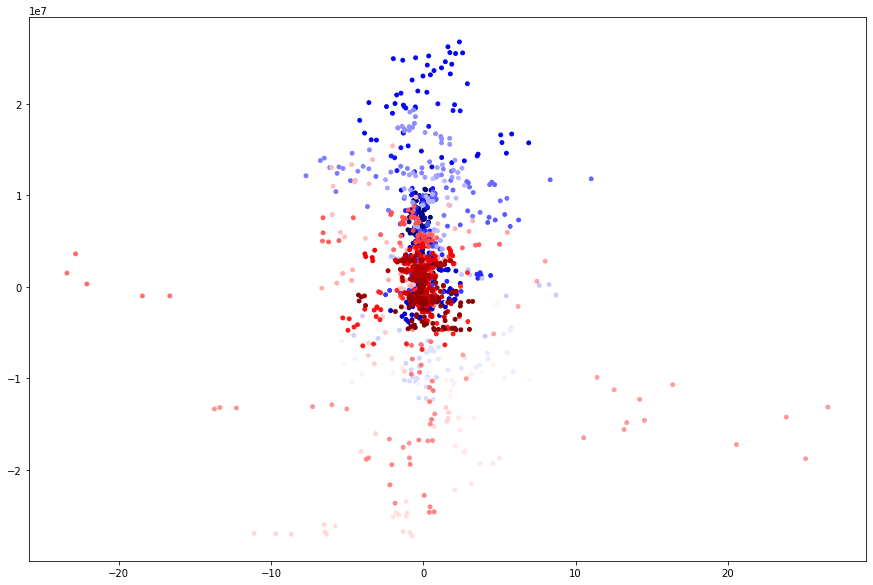

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(dora.data.spread, dora.data.volume, c=dora.data.index, cmap='seismic', s = 15)

Coefficients: 
 [-2.69733143e-08]
Mean squared error: 6.67
Coefficient of determination: -0.05


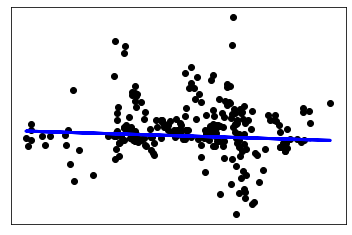

In [5]:
dora.set_training_and_validation()
X = dora.training_data[dora.input_columns()]
y = dora.training_data[dora.output]
reg = model
reg.fit(X, y)
Xt = dora.validation_data[dora.input_columns()]
yt = dora.validation_data[dora.output]

yp = reg.predict(Xt)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yt, yp))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yt, yp))

# Plot outputs
plt.scatter(Xt, yt, color="black")
plt.plot(Xt, yp, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Small Period

In [6]:
dora.data

,spread,volume
2017-03-01,-0.121330,3.333333e+05
2017-03-02,0.074197,-5.666667e+05
2017-03-03,0.212794,-9.666667e+05
2017-03-06,0.205894,3.000000e+05
2017-03-07,0.386424,8.666667e+05
...,...,...
2022-03-14,-0.771174,-3.750000e+06
2022-03-15,-0.453684,-3.050000e+06
2022-03-16,-1.841008,-2.700000e+06
2022-03-17,-1.455202,-2.200000e+06


Coefficients: 
 [-1.27187526e-07]
Mean squared error: 7.90
Coefficient of determination: -0.05


<ipython-input-7-938d7ccd657d>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.spread = df.iloc[::-1].rolling(5).apply(lambda x: pd.np.sum(x))['spread'][::-1]
<ipython-input-7-938d7ccd657d>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.volume = df.rolling(5).apply(lambda x: pd.np.sum(x))['volume']


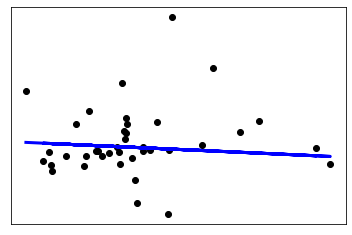

In [7]:
df = pd.read_excel('spread.xlsx', index_col=(0))
b=200
a = random.randint(0, df.shape[0]-b)
df = df.iloc[a:a+b,:]

df.rename(columns={'rfq':'volume'}, inplace=True)
df.spread = df.iloc[::-1].rolling(5).apply(lambda x: pd.np.sum(x))['spread'][::-1]
df.volume = df.rolling(5).apply(lambda x: pd.np.sum(x))['volume']
df.dropna(inplace=True)
dora = Dora(output = 'spread', data = df)

dora.set_training_and_validation()
X = dora.training_data[dora.input_columns()]
y = dora.training_data[dora.output]
reg = model
reg.fit(X, y)
Xt = dora.validation_data[dora.input_columns()]
yt = dora.validation_data[dora.output]

yp = reg.predict(Xt)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yt, yp))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yt, yp))

# Plot outputs
plt.scatter(Xt, yt, color="black")
plt.plot(Xt, yp, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()